In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import cv2
import pickle

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

import os

In [2]:
print(os.listdir("img/"))

['images', 'masks']


In [3]:
SIZE = 256

# Loading images and masks

In [4]:
train_images = []

for directory_path in glob.glob("img/images"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)

In [5]:
train_images = np.array(train_images)

In [6]:
train_masks = [] 
for directory_path in glob.glob("img/masks/"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        mask = cv2.resize(mask, (SIZE, SIZE))
        #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        train_masks.append(mask)
        #train_labels.append(label)

In [7]:
train_masks = np.array(train_masks)

In [8]:
X_train = train_images
y_train = train_masks
y_train = np.expand_dims(y_train, axis=3)

In [9]:
X_train = X_train[:1200]
y_train = y_train[:1200]

In [10]:
X_test = X_train[1200:]
y_test = y_train[1200:]

# Creating feature extractor

In [11]:
activation = 'sigmoid'
feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))

In [12]:
X = feature_extractor.predict(X_train)

38/38 [==============================] - 43s 1s/step


In [13]:
X = X.reshape(-1, X.shape[3])

In [14]:
Y = y_train.reshape(-1)

In [15]:
dataset = pd.DataFrame(X)
dataset['Label'] = Y
print(dataset['Label'].unique())
print(dataset['Label'].value_counts())

[0 1]
0    78500051
1      143149
Name: Label, dtype: int64


In [16]:
X_for_RF = dataset.drop(labels = ['Label'], axis=1)
Y_for_RF = dataset['Label']

# Creating model

In [17]:
from sklearn.ensemble import RandomForestClassifier
from joblib import parallel_backend

In [ ]:
model = RandomForestClassifier(n_estimators = 50, max_depth=30, random_state = 42, n_jobs=10)
model.fit(X, Y)

In [ ]:
filename = 'RF_model_better_64.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

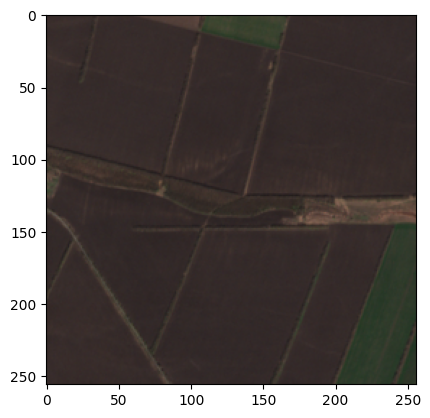

In [84]:
test_img = cv2.imread("img/images/T36UXV_20200406T083559_TCI_10m_9_23.png", cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE, SIZE))
plt.imshow(test_img)
plt.show()
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

In [86]:
z_erozjami = "img/masks/bin_mask_40_27.png"

(256, 256)


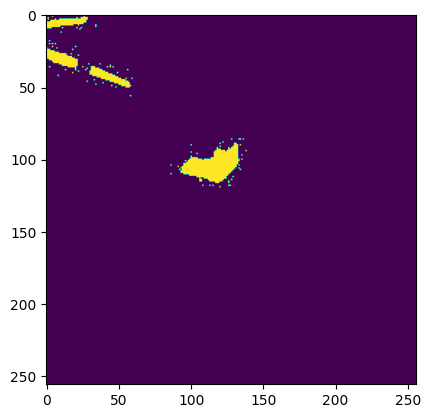

In [87]:
test_mask = cv2.imread("img/masks/bin_mask_9_23.png", 0)       
test_mask = cv2.resize(test_mask, (SIZE, SIZE))
print(test_mask.shape)
plt.imshow(test_mask)
plt.show()
#     test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_mask, axis=0)
    

In [88]:
test_img = cv2.imread("img/images/T36UXV_20200406T083559_TCI_10m_9_23.png", cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE, SIZE))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

In [89]:
X_test_feature = feature_extractor.predict(test_img)
X_test_feature = X_test_feature.reshape(-1, X_test_feature.shape[3])

1/1 [==============================] - 0s 23ms/step


In [90]:
prediction = loaded_model.predict(X_test_feature)

In [91]:
prediction_image = prediction.reshape(mask.shape)

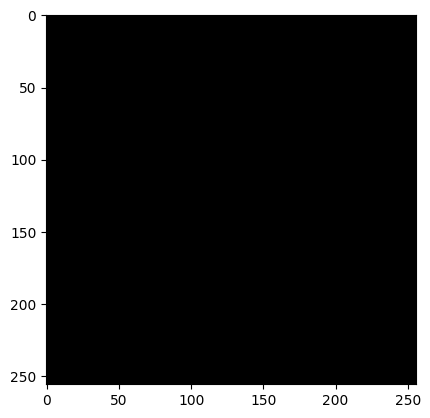

In [92]:
plt.imshow(prediction_image, cmap='gray')
plt.show()